<a href="https://colab.research.google.com/github/pathmakantha/ID-Card-Tampering/blob/main/ID_Card_Tampering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir pan_card_tempering
!mkdir pan_card_tempering/image

In [ ]:
#Open image and diplay
original = Image.open('/content/pan_card_tempering/image/id_pathma.jpg')
tampered = Image.open('/content/pan_card_tempering/image/id_tempering.jpg')

In [ ]:
#the file format of the source file
print("Original image format : " ,original.format)
print("Tampered image format : " ,tampered.format)

# Image size, int pixels. The size is given as a 2-tuple (width, height)
print("Original image size : " ,original.size)
print("Tampered image size : " ,tampered.size)


Original image format :  JPEG
Tampered image format :  JPEG
Original image size :  (1000, 621)
Tampered image size :  (1091, 678)


In [ ]:
#Resize images
original = original.resize((250,160))
print(original.size)
original.save('pan_card_tempering/image/original.png')
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tempering/image/tampered.png')

(250, 160)
(250, 160)


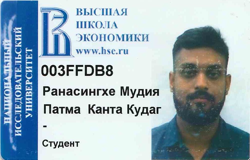

In [ ]:
#Display images
original

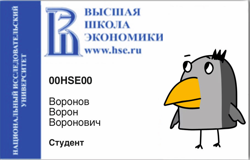

In [ ]:
tampered

In [ ]:
#Load the two input images
original = cv2.imread('pan_card_tempering/image/original.png')
tampered = cv2.imread('pan_card_tempering/image/tampered.png')

In [ ]:
#Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [ ]:
# Compute the structural similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.2879102665066433


In [ ]:
# Calculate threshold and contours
thresh = cv2.threshold(diff,0,255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
#loop over the contours
for c in cnts:
  # applying contours on image
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x,y), (x + w, y + h), (0, 0, 255), 2)
  cv2.rectangle(tampered, (x,y), (x + w, y + h), (0, 0, 255), 2)

Original format Image


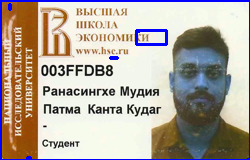

In [ ]:
# Display the original image with contour
print('Original format Image')
Image.fromarray(original)

Tampered Image


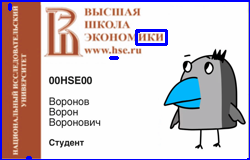

In [ ]:
# Display the tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


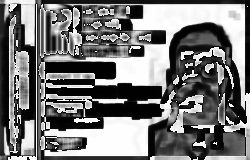

In [ ]:
# Display difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


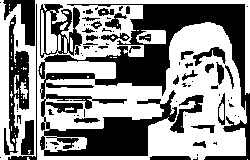

In [ ]:
# Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)